In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# utility functions
def load_data(path):
    data = pd.read_csv(path)
    return data

In [2]:
data = load_data('Crashes.csv')

# Info, missing, duplicates

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257925 entries, 0 to 257924
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   RD_NO                          257925 non-null  object 
 1   CRASH_DATE                     257925 non-null  object 
 2   POSTED_SPEED_LIMIT             257925 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         257925 non-null  object 
 4   DEVICE_CONDITION               257925 non-null  object 
 5   WEATHER_CONDITION              257925 non-null  object 
 6   LIGHTING_CONDITION             257925 non-null  object 
 7   FIRST_CRASH_TYPE               257925 non-null  object 
 8   TRAFFICWAY_TYPE                257925 non-null  object 
 9   ALIGNMENT                      257925 non-null  object 
 10  ROADWAY_SURFACE_COND           257925 non-null  object 
 11  ROAD_DEFECT                    257925 non-null  object 
 12  REPORT_TYPE                   

In [4]:
data.head()

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,JC113649,01/12/2019 12:01:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,1.0,0.0,0,7,1,41.894718,-87.716439,POINT (-87.716439109795 41.894718028422)
1,JC113627,01/11/2019 11:36:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,23,6,1,41.961558,-87.757564,POINT (-87.757564024038 41.961557797444)
2,JC113637,01/11/2019 11:31:00 PM,15,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DARKNESS,SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,23,6,1,41.791460,-87.715908,POINT (-87.715907858157 41.791459913725)
3,JC113630,01/11/2019 11:22:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,1.0,0.0,23,6,1,41.876779,-87.741695,POINT (-87.741694507685 41.876778736117)
4,JC113604,01/11/2019 11:08:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,3.0,0.0,23,6,1,41.960921,-87.739893,POINT (-87.739893056441 41.960920858153)


In [5]:
min_date = pd.to_datetime(data['CRASH_DATE']).min()
max_date = pd.to_datetime(data['CRASH_DATE']).max()

print(f"The range of dates is from {min_date} to {max_date}.")

The range of dates is from 2014-01-18 18:14:00 to 2019-01-12 00:01:00.


In [6]:
data.duplicated().sum()

0

In [7]:
null_columns = data.columns[data.isnull().any()]
null_rows = data.isnull().any(axis=1).sum()

print(f"Number of rows with nulls: {null_rows}\n")

# List to store the results
nulls_info_list = []

# Populate the list with the information
for col in null_columns:
    num_nulls = data[col].isnull().sum()
    pct_nulls = num_nulls / len(data[col]) * 100
    dtype = data[col].dtype
    if dtype == 'object':
        num_unique = data[col].nunique()
        random_value = data[col].dropna().sample(1).values[0]
    else:
        num_unique = '-'
        random_value = '-'
    nulls_info_list.append({
        'Column': col,
        'Num_Nulls': num_nulls,
        'Pct_Nulls': pct_nulls,
        'Type': dtype,
        'Num_Unique': num_unique,
        'Random_Value': random_value
    })

pd.DataFrame(nulls_info_list).sort_values(by='Num_Nulls', ascending=False)

Number of rows with nulls: 6016



,Column,Num_Nulls,Pct_Nulls,Type,Num_Unique,Random_Value
0,REPORT_TYPE,4996,1.936997,object,2,NOT ON SCENE (DESK REPORT)
5,LATITUDE,1022,0.396239,float64,-,-
6,LONGITUDE,1022,0.396239,float64,-,-
7,LOCATION,1022,0.396239,object,132461,POINT (-87.639758684881 41.881994338205)
4,MOST_SEVERE_INJURY,7,0.002714,object,5,NO INDICATION OF INJURY
3,BEAT_OF_OCCURRENCE,4,0.001551,float64,-,-
1,STREET_DIRECTION,2,0.000775,object,4,S
2,STREET_NAME,1,0.000388,object,1479,CICERO AVE


1. **REPORT_TYPE**: This column contains information about the type of report (e.g., 'ON SCENE', 'NOT ON SCENE (DESK REPORT)'). This type of data is usually specific to the dataset and may not be available online.
2. **STREET_DIRECTION**: This column contains street directions (e.g., 'S' for South). Street directions are generally standardized and can be found online, but the specific context (e.g., related to a particular dataset) may not be available.
3. **STREET_NAME**: This column contains street names (e.g., 'DIVERSEY AVE'). Street names are publicly available and can be retrieved online from various sources like maps or city databases.
4. **BEAT_OF_OCCURRENCE**: This column contains information about the beat of occurrence, which is likely specific to a particular dataset or organization (e.g., police beats). This data may not be readily available online.
5. **MOST_SEVERE_INJURY**: This column contains information about the severity of injuries (e.g., 'NO INDICATION OF INJURY'). This type of data is usually specific to the dataset and may not be available online.
6. **LATITUDE** and **LONGITUDE**: These columns contain geographical coordinates. Latitude and longitude data can be retrieved online from various mapping services.
7. **LOCATION**: This column contains location data in the form of geographical coordinates (e.g., 'POINT (-87.712665377938 41.939731753033)'). Location data can be retrieved online from various mapping services.

We will try to retrieve missing data for street direction, street names, lat-lng and location from external accessible sources online.

# Insights

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
POSTED_SPEED_LIMIT,257925.0,28.163877,6.916950,0.000000,30.000000,30.000000,30.000000,99.000000
STREET_NO,257925.0,3573.144879,2948.210235,0.000000,1158.000000,3100.000000,5501.000000,451100.000000
BEAT_OF_OCCURRENCE,257921.0,1242.046662,713.282194,111.000000,712.000000,1214.000000,1824.000000,2535.000000
NUM_UNITS,257925.0,2.022797,0.400398,1.000000,2.000000,2.000000,2.000000,18.000000
INJURIES_TOTAL,257925.0,0.153463,0.505677,0.000000,0.000000,0.000000,0.000000,21.000000
INJURIES_FATAL,257925.0,0.000888,0.032641,0.000000,0.000000,0.000000,0.000000,3.000000
INJURIES_INCAPACITATING,257925.0,0.016861,0.151624,0.000000,0.000000,0.000000,0.000000,7.000000
INJURIES_NON_INCAPACITATING,257925.0,0.082249,0.365792,0.000000,0.000000,0.000000,0.000000,21.000000
INJURIES_REPORTED_NOT_EVIDENT,257925.0,0.053465,0.295557,0.000000,0.000000,0.000000,0.000000,10.000000
INJURIES_NO_INDICATION,257925.0,2.033083,1.160398,0.000000,1.000000,2.000000,2.000000,61.000000


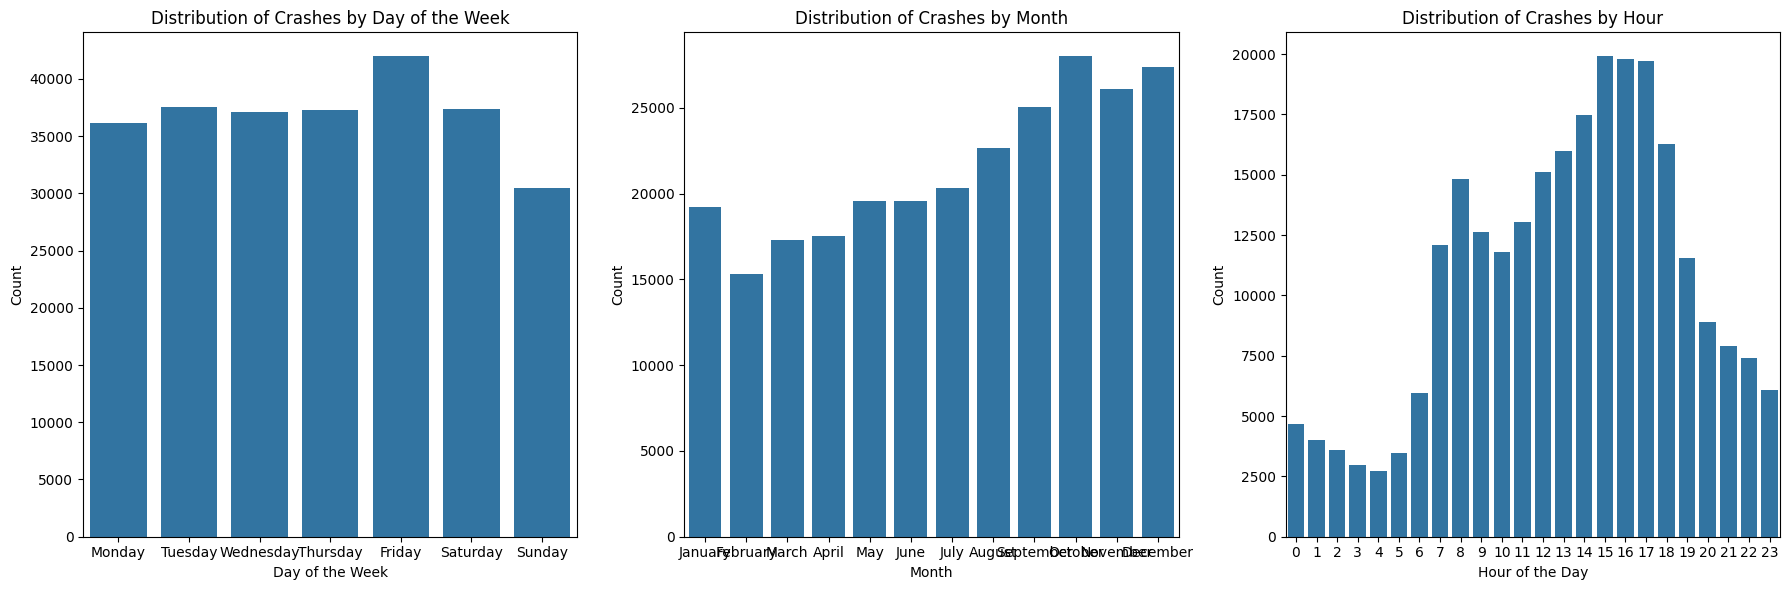

In [6]:
# Convert the CRASH_DATE column to datetime format
data['CRASH_DATE'] = pd.to_datetime(data['CRASH_DATE'])

# Extract day of the week, month, and hour from the CRASH_DATE
data['CRASH_DAY_OF_WEEK'] = data['CRASH_DATE'].dt.day_name()
data['CRASH_MONTH'] = data['CRASH_DATE'].dt.month_name()
data['CRASH_HOUR'] = data['CRASH_DATE'].dt.hour

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the countplot for CRASH_DAY_OF_WEEK
sns.countplot(ax=axes[0], x='CRASH_DAY_OF_WEEK', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axes[0].set_title('Distribution of Crashes by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Count')

# Plot the countplot for CRASH_MONTH
sns.countplot(ax=axes[1], x='CRASH_MONTH', data=data, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
axes[1].set_title('Distribution of Crashes by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Count')

# Plot the countplot for CRASH_HOUR
sns.countplot(ax=axes[2], x='CRASH_HOUR', data=data)
axes[2].set_title('Distribution of Crashes by Hour')
axes[2].set_xlabel('Hour of the Day')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
data.describe(include=['object']).T

,count,unique,top,freq
RD_NO,257925,257925,JC113649,1
CRASH_DATE,257925,166465,11/10/2017 10:30:00 AM,27
TRAFFIC_CONTROL_DEVICE,257925,15,NO CONTROLS,148894
DEVICE_CONDITION,257925,8,NO CONTROLS,150267
WEATHER_CONDITION,257925,9,CLEAR,205435
LIGHTING_CONDITION,257925,6,DAYLIGHT,169330
FIRST_CRASH_TYPE,257925,15,REAR END,65883
TRAFFICWAY_TYPE,257925,11,NOT DIVIDED,118692
ALIGNMENT,257925,6,STRAIGHT AND LEVEL,251633
ROADWAY_SURFACE_COND,257925,7,DRY,195116


In [10]:
'''import re

# Function to identify and convert probable date columns
def identify_and_convert_dates(df):
    date_pattern = re.compile(r'\d{2}/\d{2}/\d{4} \d{2}:\d{2}:\d{2} (AM|PM)')
    probable_date_columns = []

    for col in df.select_dtypes(include=['object']).columns:
        if df[col].apply(lambda x: bool(date_pattern.match(str(x)))).any():
            probable_date_columns.append(col)
            df[col] = pd.to_datetime(df[col], format='%m/%d/%Y %I:%M:%S %p')

    return probable_date_columns

# Example usage
identify_and_convert_dates(data)'''

"import re\n\n# Function to identify and convert probable date columns\ndef identify_and_convert_dates(df):\n    date_pattern = re.compile(r'\\d{2}/\\d{2}/\\d{4} \\d{2}:\\d{2}:\\d{2} (AM|PM)')\n    probable_date_columns = []\n\n    for col in df.select_dtypes(include=['object']).columns:\n        if df[col].apply(lambda x: bool(date_pattern.match(str(x)))).any():\n            probable_date_columns.append(col)\n            df[col] = pd.to_datetime(df[col], format='%m/%d/%Y %I:%M:%S %p')\n\n    return probable_date_columns\n\n# Example usage\nidentify_and_convert_dates(data)"

In [ ]:
from dataprep.eda import plot, plot_correlation, create_report, plot_missing
create_report(data)

In [15]:
data.columns

Index(['RD_NO', 'CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE',
       'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'LOCATION'],
      dtype='object')

<Axes: xlabel='CRASH_DATE'>

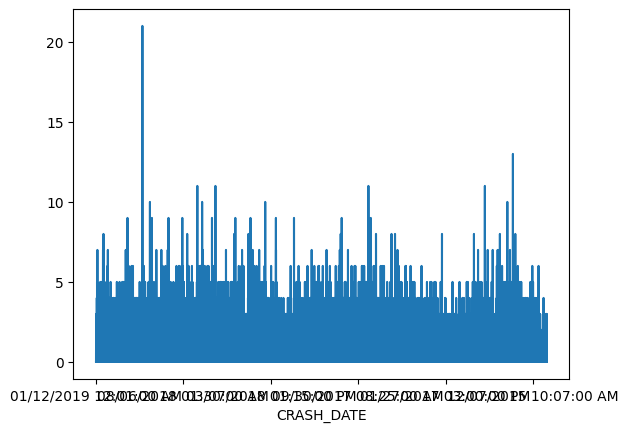

In [16]:
data.set_index('CRASH_DATE')['INJURIES_TOTAL'].plot(figsize=(12,6))

In [7]:
# Get the location with the highest count
most_common_location = data['LOCATION'].value_counts().idxmax()
count = data['LOCATION'].value_counts().max()

most_common_location

'POINT (-87.905309125103 41.976201139024)'

# Data Cleaning
Missing values

# Data Integration

# Data prep (I)
- Datetime conversion
- String format
- Handle geo data (?)